In [1]:
# handling data 
import numpy as np 
import pandas as pd 

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pickle

In [2]:
file = open('model_data.pkl', 'rb')
data = pickle.load(file)
file.close()

In [3]:
x_train = data['x_train_log']
x_test = data['x_test_log']
y_train = data['y_train_log']
y_test = data['y_test_log']

In [4]:
svr = SVR(C=1.0, epsilon=0.2)
svr.fit(x_train, y_train)

SVR(epsilon=0.2)

In [5]:
y_pred = svr.predict(x_test)

In [6]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.0421603767492578
MSE: 1.6336026402885973
RMSE: 1.2781246575700655


In [7]:
parameters = {
    'kernel': ('linear', 'rbf','poly'), 
    'C':[i*0.5 for i in range(1, 10)],
    'gamma': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    'epsilon':[0.1,0.2,0.3, 0.4, 0.5, 0.6]}

In [8]:
svr_random = RandomizedSearchCV(
    estimator = svr, 
    param_distributions = parameters,
    scoring='neg_mean_squared_error', 
    n_iter = 10, 
    cv = 5, 
    verbose=3, 
    random_state=42, 
    n_jobs = 1)

In [9]:
svr_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=4.5, epsilon=0.6, gamma=0.001, kernel=rbf;, score=-1.652 total time=   2.6s
[CV 2/5] END C=4.5, epsilon=0.6, gamma=0.001, kernel=rbf;, score=-1.673 total time=   2.6s
[CV 3/5] END C=4.5, epsilon=0.6, gamma=0.001, kernel=rbf;, score=-1.672 total time=   2.6s
[CV 4/5] END C=4.5, epsilon=0.6, gamma=0.001, kernel=rbf;, score=-1.672 total time=   2.6s
[CV 5/5] END C=4.5, epsilon=0.6, gamma=0.001, kernel=rbf;, score=-1.611 total time=   2.6s
[CV 1/5] END C=3.5, epsilon=0.5, gamma=0.1, kernel=poly;, score=-1.659 total time=   1.8s
[CV 2/5] END C=3.5, epsilon=0.5, gamma=0.1, kernel=poly;, score=-1.671 total time=   1.9s
[CV 3/5] END C=3.5, epsilon=0.5, gamma=0.1, kernel=poly;, score=-1.655 total time=   1.9s
[CV 4/5] END C=3.5, epsilon=0.5, gamma=0.1, kernel=poly;, score=-1.665 total time=   1.8s
[CV 5/5] END C=3.5, epsilon=0.5, gamma=0.1, kernel=poly;, score=-1.602 total time=   1.9s
[CV 1/5] END C=4.5, epsilon=0.6, g

RandomizedSearchCV(cv=5, estimator=SVR(epsilon=0.2), n_jobs=1,
                   param_distributions={'C': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5,
                                              4.0, 4.5],
                                        'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                    0.6],
                                        'gamma': [1e-07, 1e-06, 1e-05, 0.0001,
                                                  0.001, 0.01, 0.1],
                                        'kernel': ('linear', 'rbf', 'poly')},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [10]:
svr_random.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'epsilon': 0.6, 'C': 0.5}

In [11]:
prediction = svr_random.predict(x_test)

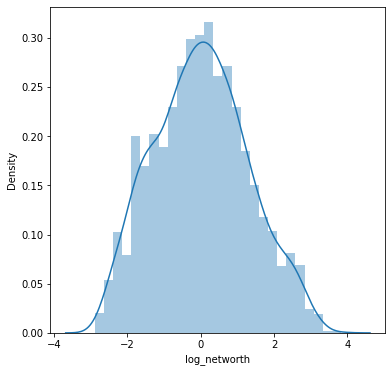

In [12]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction)
plt.show()

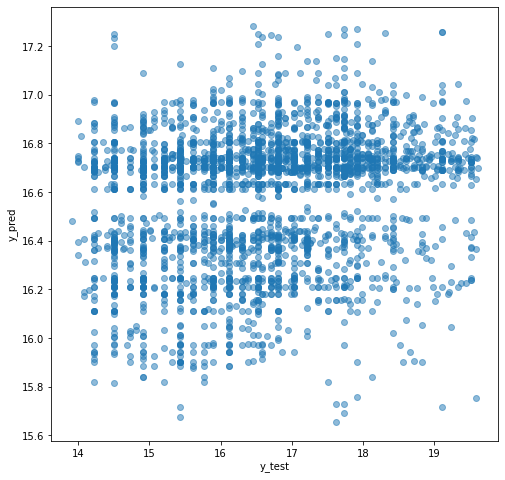

In [13]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [14]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.047032649425508
MSE: 1.6531386071620713
RMSE: 1.285744378623555


In [15]:
root = '../../data/ML_models/'

file = open(root + 'SupportVectorRegressor.pkl', 'wb')
pickle.dump(svr_random, file)
file.close()